In [ ]:
#Task 1
import pandas as pd
file = "/content/Telco_Customer_Churn_Dataset  (3).csv"
df = pd.read_csv(file)
df.head()
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical variables manually
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
df["Partner"] = df["Partner"].map({"No": 0, "Yes": 1})
df["Dependents"] = df["Dependents"].map({"No": 0, "Yes": 1})
df["PhoneService"] = df["PhoneService"].map({"No": 0, "Yes": 1})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"No": 0, "Yes": 1})
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})  # Target variable

# Drop unnecessary column
df.drop(columns=["customerID"], inplace=True)

# Define features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (5634, 19) (5634,)
Testing Set: (1409, 19) (1409,)


<ipython-input-9-d8ef8ec5a25a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


<ipython-input-8-2046d9d30361>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
<ipython-input-8-2046d9d30361>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="pastel")
<ipython-input-8-2046d9d30361>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

Overall Churn Rate: 26.54%


<ipython-input-8-2046d9d30361>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Dependents", data=df, palette="pastel")


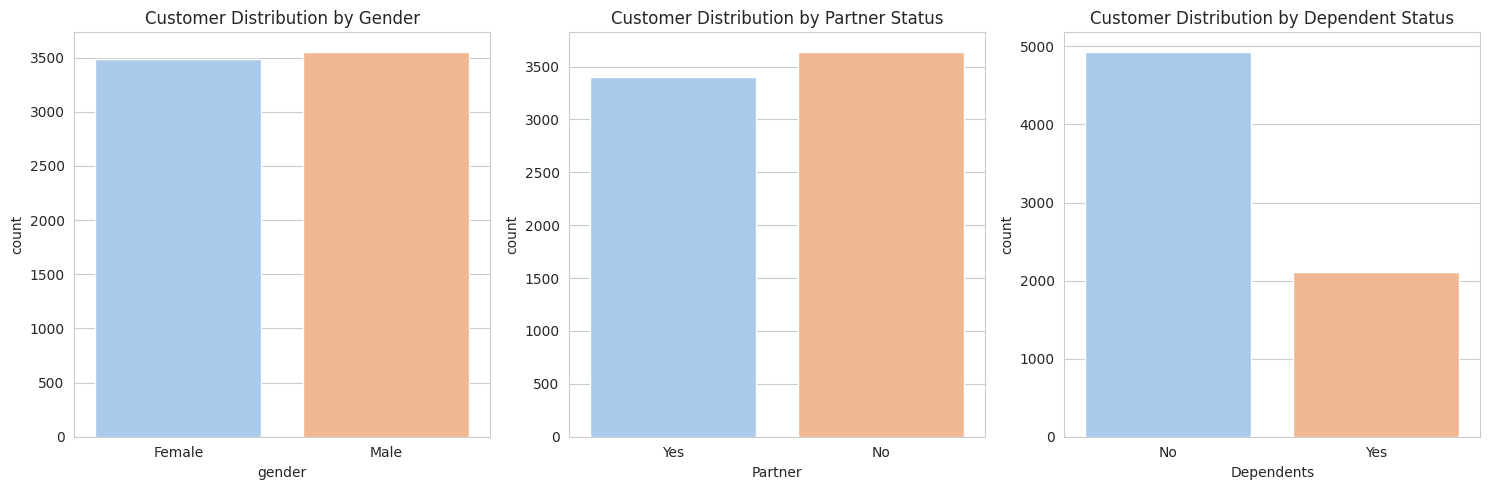

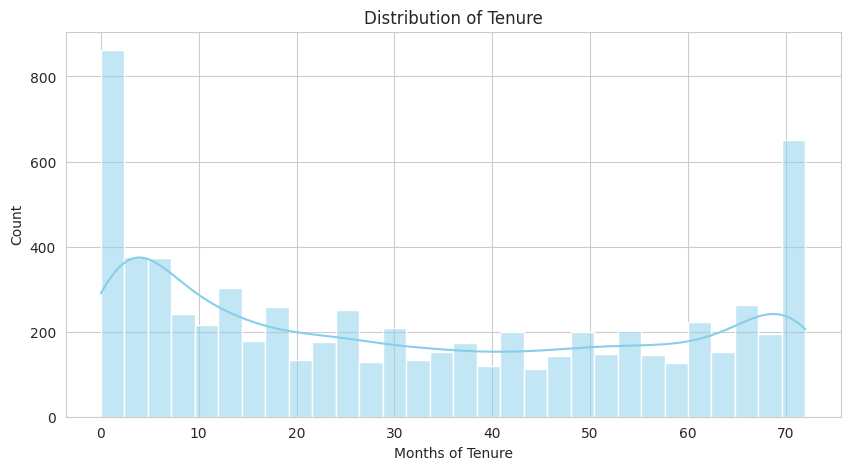

<ipython-input-8-2046d9d30361>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=df, palette=["lightcoral", "lightgreen"])


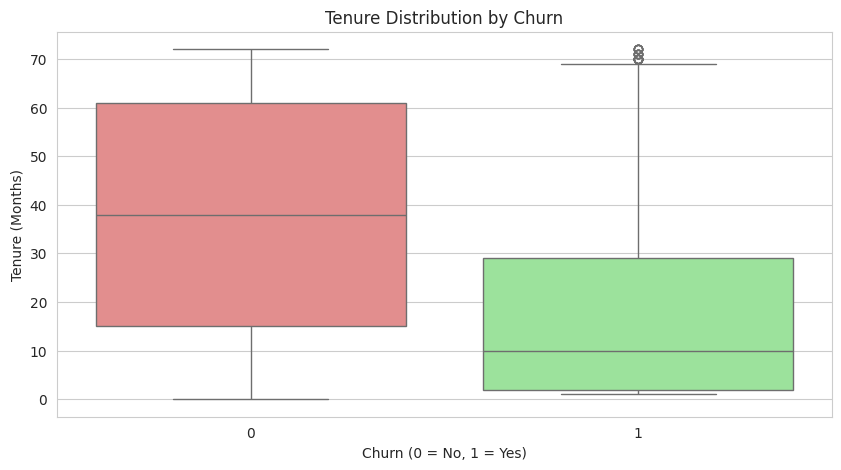

<ipython-input-8-2046d9d30361>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Contract"].value_counts().index, y=df.groupby("Contract")["Churn"].mean() * 100, palette="pastel")
<ipython-input-8-2046d9d30361>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["PaymentMethod"].value_counts().index, y=df.groupby("PaymentMethod")["Churn"].mean() * 100, palette="pastel")


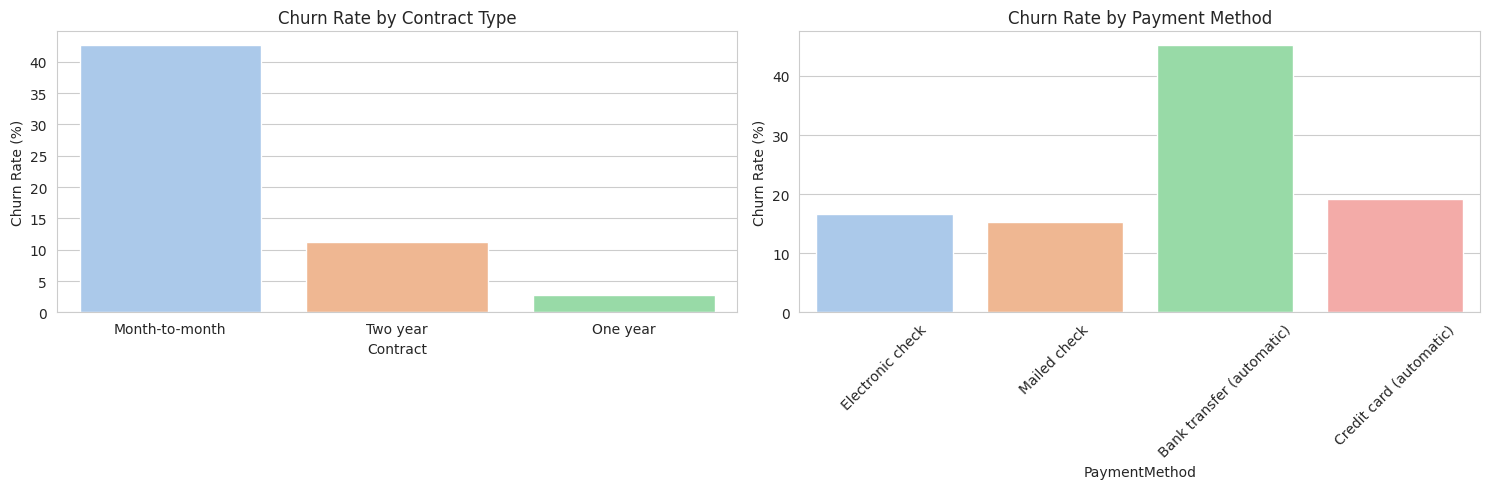

In [ ]:
#Task 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = "/content/Telco_Customer_Churn_Dataset  (3).csv"
df = pd.read_csv(file)

# Convert 'TotalCharges' to numeric and handle missing values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical variables
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Calculate churn rate
churn_rate = df["Churn"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Set plot style
sns.set_style("whitegrid")

# 1. Customer distribution by gender, partner status, and dependents
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x="gender", data=df, palette="pastel")
plt.title("Customer Distribution by Gender")

plt.subplot(1, 3, 2)
sns.countplot(x="Partner", data=df, palette="pastel")
plt.title("Customer Distribution by Partner Status")

plt.subplot(1, 3, 3)
sns.countplot(x="Dependents", data=df, palette="pastel")
plt.title("Customer Distribution by Dependent Status")

plt.tight_layout()
plt.show()

# 2. Tenure distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["tenure"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Tenure")
plt.xlabel("Months of Tenure")
plt.ylabel("Count")
plt.show()

# 3. Tenure vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x="Churn", y="tenure", data=df, palette=["lightcoral", "lightgreen"])
plt.title("Tenure Distribution by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.show()

# 4. Churn variation across contract types and payment methods
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=df["Contract"].value_counts().index, y=df.groupby("Contract")["Churn"].mean() * 100, palette="pastel")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")

plt.subplot(1, 2, 2)
sns.barplot(x=df["PaymentMethod"].value_counts().index, y=df.groupby("PaymentMethod")["Churn"].mean() * 100, palette="pastel")
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-13-dfc879fb17b6>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
<ipython-input-13-dfc879fb17b6>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x=df["TenureGroup"], y=df.groupby("TenureGroup")["Churn"].mean() * 100, palette="pastel")
<ipyt

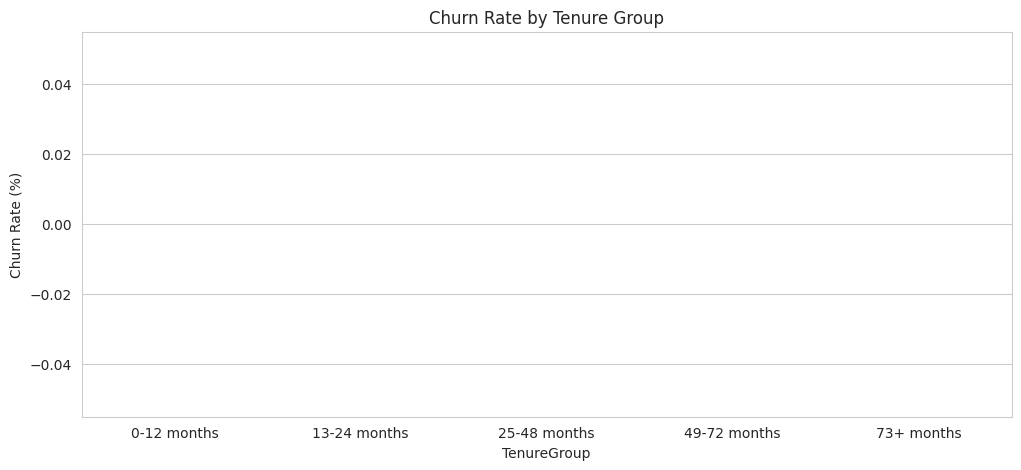

<ipython-input-13-dfc879fb17b6>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x=df["SpendingGroup"], y=df.groupby("SpendingGroup")["Churn"].mean() * 100, palette="pastel")
<ipython-input-13-dfc879fb17b6>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["SpendingGroup"], y=df.groupby("SpendingGroup")["Churn"].mean() * 100, palette="pastel")


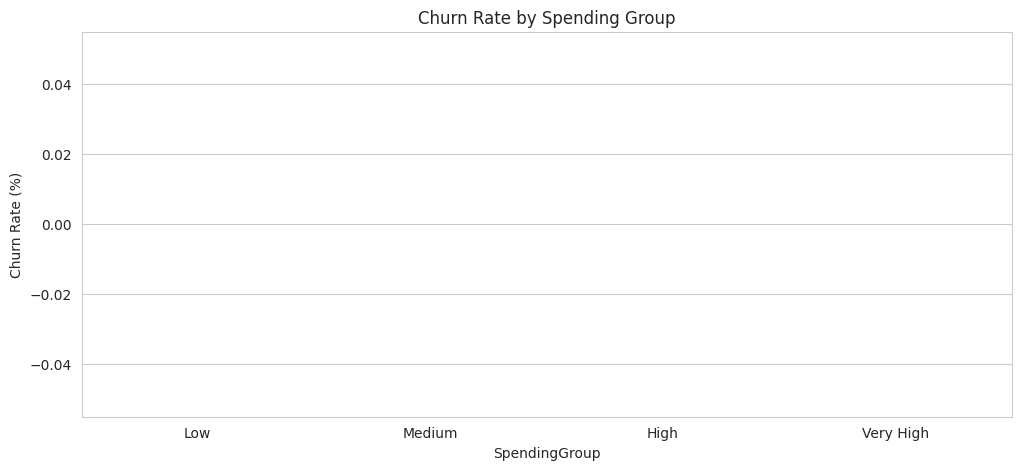

<ipython-input-13-dfc879fb17b6>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Contract"].value_counts().index, y=df.groupby("Contract")["Churn"].mean() * 100, palette="pastel")


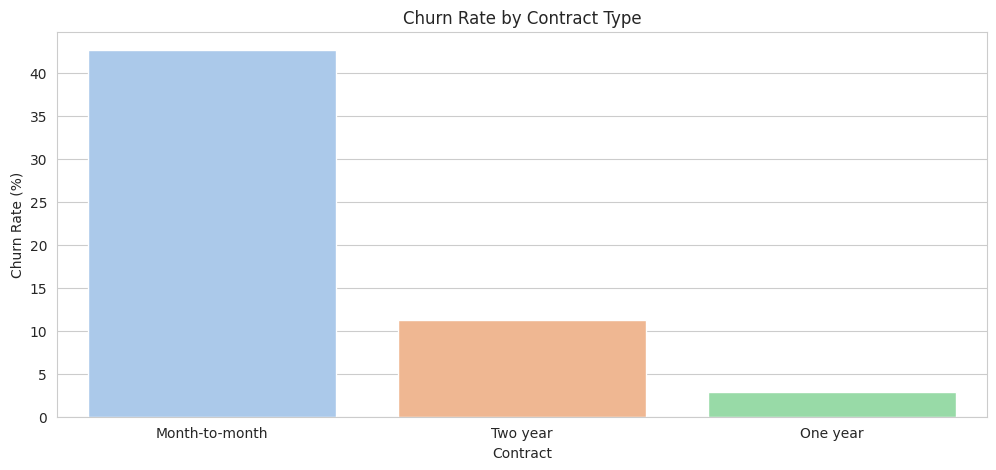

Total High-Value Customers at Risk: 2382
    customerID  MonthlyCharges        Contract  Churn
4   9237-HQITU           70.70  Month-to-month      1
5   9305-CDSKC           99.65  Month-to-month      1
6   1452-KIOVK           89.10  Month-to-month      0
8   7892-POOKP          104.80  Month-to-month      1
13  0280-XJGEX          103.70  Month-to-month      1


In [ ]:
#Task 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file = "/content/Telco_Customer_Churn_Dataset  (3).csv"  # Update with correct path
df = pd.read_csv(file)

# Convert 'TotalCharges' to numeric and handle missing values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode 'Churn' column (0 = No, 1 = Yes)
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Segment customers by tenure
# The max value of tenure is 72, causing a duplicate in the bins.
# Adding 1 to the max value ensures unique bins
df["TenureGroup"] = pd.cut(df["tenure"], bins=[0, 12, 24, 48, 72, df["tenure"].max() + 1],
                           labels=["0-12 months", "13-24 months", "25-48 months", "49-72 months", "73+ months"])

# Segment customers by spending
df["SpendingGroup"] = pd.cut(df["MonthlyCharges"], bins=[0, 30, 60, 90, df["MonthlyCharges"].max()],
                             labels=["Low", "Medium", "High", "Very High"])

# Plot churn rate by tenure group
plt.figure(figsize=(12, 5))
sns.barplot(x=df["TenureGroup"], y=df.groupby("TenureGroup")["Churn"].mean() * 100, palette="pastel")
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()

# Plot churn rate by spending group
plt.figure(figsize=(12, 5))
sns.barplot(x=df["SpendingGroup"], y=df.groupby("SpendingGroup")["Churn"].mean() * 100, palette="pastel")
plt.title("Churn Rate by Spending Group")
plt.ylabel("Churn Rate (%)")
plt.show()

# Plot churn rate by contract type
plt.figure(figsize=(12, 5))
sns.barplot(x=df["Contract"].value_counts().index, y=df.groupby("Contract")["Churn"].mean() * 100, palette="pastel")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()

# Identify high-value customers at risk
high_value_risk = df[(df["SpendingGroup"].isin(["High", "Very High"])) & (df["Contract"] == "Month-to-month")]

# Print summary
print(f"Total High-Value Customers at Risk: {high_value_risk.shape[0]}")
print(high_value_risk[["customerID", "MonthlyCharges", "Contract", "Churn"]].head())

<ipython-input-15-ddd23a866a9b>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

Logistic Regression - Accuracy: 0.79, Precision: 0.61, Recall: 0.56, F1-score: 0.58
Decision Tree - Accuracy: 0.73, Precision: 0.50, Recall: 0.53, F1-score: 0.52
Random Forest - Accuracy: 0.79, Precision: 0.63, Recall: 0.50, F1-score: 0.56


<ipython-input-15-ddd23a866a9b>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="pastel")


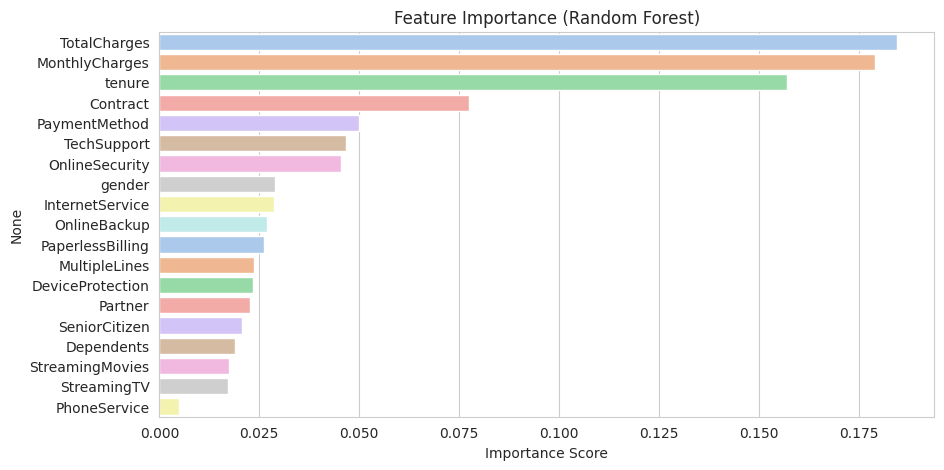

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.801027736756916


In [ ]:
#Task 4
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load dataset
file = "/content/Telco_Customer_Churn_Dataset  (3).csv"  # Update with correct path
df = pd.read_csv(file)

# Convert 'TotalCharges' to numeric and handle missing values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols.remove("customerID")  # Remove 'customerID' as it's not a feature

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Define features and target
X = df.drop(columns=["Churn", "customerID"])
y = df["Churn"]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate models function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return acc, precision, recall, f1

# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr_metrics = evaluate_model(lr, X_train, X_test, y_train, y_test)

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt_metrics = evaluate_model(dt, X_train, X_test, y_train, y_test)

# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf_metrics = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Print model performance
print(f"Logistic Regression - Accuracy: {lr_metrics[0]:.2f}, Precision: {lr_metrics[1]:.2f}, Recall: {lr_metrics[2]:.2f}, F1-score: {lr_metrics[3]:.2f}")
print(f"Decision Tree - Accuracy: {dt_metrics[0]:.2f}, Precision: {dt_metrics[1]:.2f}, Recall: {dt_metrics[2]:.2f}, F1-score: {dt_metrics[3]:.2f}")
print(f"Random Forest - Accuracy: {rf_metrics[0]:.2f}, Precision: {rf_metrics[1]:.2f}, Recall: {rf_metrics[2]:.2f}, F1-score: {rf_metrics[3]:.2f}")

# Feature Importance (Random Forest)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="pastel")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

# Hyperparameter Tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring="accuracy", cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
